# R025 - Rohan Jain
# R054 - Archisha Sinha

## Domain: Reinforcement Learning
## Topic: Tic-Tac-Toe using Q-learning

## **Q-learning Algorithm:**

Q-learning is a model-free reinforcement learning algorithm used to find the optimal action-selection policy using the Bellman equation. The agent learns the Q-value (action-value) function to estimate the reward for each state-action pair and updates its knowledge based on the environment's feedback.


**Steps of Q-learning:**

- Initialize the Q-table, where each state is mapped to an array representing action values.
- Choose an action using an epsilon-greedy policy (where a random action is taken with probability epsilon, and the best-known action is taken otherwise).
- Execute the action in the environment, observe the next state, and get the reward.
- Update the Q-value for the current state-action pair using the Bellman equation:




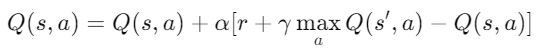

- Repeat the process for multiple episodes until the policy converges.

**Problem Statement**

The task is to create a Tic-Tac-Toe game where an RL agent learns to play by training against itself. The board is a 3x3 grid, and the two players alternate marking X and O. The agent receives a reward of +1 for winning, 0.5 for a draw, and 0 for any other action.


In [1]:
import numpy as np
import random

In [2]:
# Initialize the environment
board = [' ' for _ in range(9)]  # Tic-Tac-Toe board (3x3)
q_table = {}  # Initialize Q-table
epsilon = 0.1  # Exploration rate
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
player1 = 'X'
player2 = 'O'
episodes = 10000

In [3]:
# Functions to check game status
def check_winner(board, player):
    win_conditions = [(0, 1, 2), (3, 4, 5), (6, 7, 8),  # rows
                      (0, 3, 6), (1, 4, 7), (2, 5, 8),  # columns
                      (0, 4, 8), (2, 4, 6)]  # diagonals
    for condition in win_conditions:
        if board[condition[0]] == board[condition[1]] == board[condition[2]] == player:
            return True
    return False

In [4]:
def is_draw(board):
    return ' ' not in board

In [5]:
def available_actions(board):
    return [i for i in range(9) if board[i] == ' ']

In [6]:
# Convert the board to a tuple (state representation)
def get_state(board):
    return tuple(board)


In [7]:
# Update Q-table using the Bellman equation
def update_q_table(state, action, reward, next_state, done):
    if state not in q_table:
        q_table[state] = np.zeros(9)  # Initialize Q-values for all actions

    if next_state not in q_table:
        q_table[next_state] = np.zeros(9)  # Initialize for next state if unseen

    if done:
        q_table[state][action] = reward  # No next state if done
    else:
        q_table[state][action] = q_table[state][action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])

In [8]:
# Main loop to run Q-learning
for episode in range(episodes):
    board = [' ' for _ in range(9)]  # Reset the board
    done = False
    player_turn = player1  # Player 1 starts
    state = get_state(board)

    while not done:
        # Choose action
        if random.uniform(0, 1) < epsilon:  # Exploration
            action = random.choice(available_actions(board))
        else:  # Exploitation
            q_values = q_table.get(state, np.zeros(9))
            action = np.argmax(q_values)

        # Make the move
        board[action] = player_turn
        next_state = get_state(board)

        # Check if the game is over
        if check_winner(board, player_turn):
            reward = 1  # Win reward
            update_q_table(state, action, reward, next_state, done=True)
            done = True
        elif is_draw(board):
            reward = 0.5  # Draw reward
            update_q_table(state, action, reward, next_state, done=True)
            done = True
        else:
            reward = 0  # No reward yet
            update_q_table(state, action, reward, next_state, done=False)
            state = next_state

        # Switch player
        player_turn = player2 if player_turn == player1 else player1

In [9]:
# Testing the learned policy
board = [' ' for _ in range(9)]
state = get_state(board)
done = False

while not done:
    q_values = q_table.get(state, np.zeros(9))
    action = np.argmax(q_values)  # Pick the best learned action
    board[action] = player1  # Play as 'X'
    print(np.array(board).reshape(3, 3), "\n")  # Print board

    if check_winner(board, player1):
        print("Player X wins!")
        break
    elif is_draw(board):
        print("It's a draw!")
        break

    # Simulate a random opponent move
    opponent_action = random.choice(available_actions(board))
    board[opponent_action] = player2
    state = get_state(board)

    if check_winner(board, player2):
        print(np.array(board).reshape(3, 3))
        print("Player O wins!")
        break
    elif is_draw(board):
        print("It's a draw!")
        break

[[' ' ' ' ' ']
 ['X' ' ' ' ']
 [' ' ' ' ' ']] 

[['X' ' ' ' ']
 ['X' ' ' ' ']
 [' ' ' ' 'O']] 

[['X' ' ' ' ']
 ['X' 'O' ' ']
 [' ' ' ' 'O']] 

[['X' 'O' ' ']
 ['X' 'O' ' ']
 [' ' ' ' 'O']] 

[['X' 'O' ' ']
 ['X' 'O' ' ']
 ['O' ' ' 'O']] 

[['X' 'O' ' ']
 ['X' 'O' 'O']
 ['O' ' ' 'O']] 

[['X' 'O' ' ']
 ['X' 'O' 'O']
 ['O' 'O' 'O']]
Player O wins!


**Conclusion:**
- The Q-learning agent successfully learned to play Tic-Tac-Toe by training against itself, developing strategies to win or force draws after multiple episodes.
- The epsilon-greedy policy allowed the agent to explore different strategies initially, while later focusing on exploiting its learned Q-values for optimal play.
- The RL agent’s performance showed that with proper tuning of hyperparameters like alpha and gamma, the agent could efficiently learn the game mechanics and improve over time.
- This experiment demonstrated the effectiveness of Q-learning in enabling an agent to make intelligent decisions in a simple game environment without the need for predefined strategies.